In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *

rcParams['mathtext.rm'] = "Arial"
rcParams['font.family'] = 'Arial'

In [2]:
import matplotlib.font_manager as fm
for f in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'arial' in f.lower():
        print(f)

C:\Windows\Fonts\ariali.ttf
C:\Windows\Fonts\arialbd.ttf
C:\Windows\Fonts\ARIALNI.TTF
C:\Windows\Fonts\arial.ttf
C:\Windows\Fonts\ARIALNB.TTF
C:\Windows\Fonts\ARIALN.TTF
C:\Windows\Fonts\arialbi.ttf
C:\Windows\Fonts\ARIALNBI.TTF


In [3]:
path = "experiment_results"
files = os.listdir(path)
X_datas = []
Y_datas = []
for file in files:
    if file.endswith(".xlsx"):
        full_path = os.path.join(path, file)
        X_datas.append(pd.read_excel(full_path, usecols=["H2O", "Gd(ClO4)3", "Ni-NMIDA", "NaOH", "UREA"]))
        Y_datas.append(pd.read_excel(full_path, usecols=["Crystal"]))

In [4]:
X = pd.concat(X_datas)
Y = pd.concat(Y_datas)
X = np.array(X)
Y = np.array(Y, dtype = bool)
Y = Y.T[0]

unique_rows, unique_indexes = np.unique(X, axis=0, return_index=True)
print(len(X))
print(len(unique_rows))
X = X[unique_indexes]
y = Y[unique_indexes]

_X_all = X.copy()
_y_all = y.copy()


780
780


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import roc_auc_score

all_performance = []
feature_importance = []

for random_state in range(42, 58):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    X_train_real, X_val, y_train_real, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = random_state)

    clf = LazyClassifier(verbose=0, ignore_warnings = True, custom_metric = None)
    models, predictions = clf.fit(X_train_real, X_val, y_train_real, y_val)

    display(models)

    model_name = "RandomForestClassifier"
    value = clf.models[model_name]
    y_pred = value.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, value.predict_proba(X_test)[:,1])

    all_performance.append(
        [accuracy, balanced_accuracy, f1, auc]
    )
    
    feature_importance.append(
        clf.models["RandomForestClassifier"][-1].feature_importances_
    )
    
    print(model_name)
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Balanced Accuracy: {balanced_accuracy:.3f}')
    print(f'F1 Score: {f1:.3f}')

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.43it/s]

[LightGBM] [Info] Number of positive: 112, number of negative: 387
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224449 -> initscore=-1.239926
[LightGBM] [Info] Start training from score -1.239926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.74,0.80,0.80,0.76,0.06
XGBClassifier,0.88,0.80,0.80,0.88,0.08
LGBMClassifier,0.87,0.79,0.79,0.87,0.14
BaggingClassifier,0.86,0.79,0.79,0.87,0.01
AdaBoostClassifier,0.86,0.77,0.77,0.86,0.08
ExtraTreesClassifier,0.88,0.77,0.77,0.87,0.12
KNeighborsClassifier,0.84,0.76,0.76,0.84,0.01
LabelSpreading,0.82,0.74,0.74,0.82,0.02
LabelPropagation,0.81,0.74,0.74,0.82,0.01


RandomForestClassifier
Accuracy: 0.885
Balanced Accuracy: 0.813
F1 Score: 0.881


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.39it/s]

[LightGBM] [Info] Number of positive: 112, number of negative: 387
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224449 -> initscore=-1.239926
[LightGBM] [Info] Start training from score -1.239926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.83,0.75,0.75,0.83,0.01
LabelPropagation,0.82,0.73,0.73,0.82,0.02
NearestCentroid,0.68,0.69,0.69,0.71,0.03
ExtraTreeClassifier,0.82,0.69,0.69,0.81,0.02
SVC,0.82,0.68,0.68,0.81,0.01
QuadraticDiscriminantAnalysis,0.80,0.68,0.68,0.79,0.01
ExtraTreesClassifier,0.83,0.68,0.68,0.81,0.12
BernoulliNB,0.78,0.65,0.65,0.77,0.02
DecisionTreeClassifier,0.79,0.65,0.65,0.78,0.01


RandomForestClassifier
Accuracy: 0.853
Balanced Accuracy: 0.718
F1 Score: 0.841


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.35it/s]

[LightGBM] [Info] Number of positive: 113, number of negative: 386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226453 -> initscore=-1.228450
[LightGBM] [Info] Start training from score -1.228450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.85,0.73,0.73,0.84,0.04
XGBClassifier,0.84,0.73,0.73,0.83,0.06
NearestCentroid,0.68,0.73,0.73,0.71,0.04
AdaBoostClassifier,0.83,0.72,0.72,0.83,0.08
Perceptron,0.80,0.72,0.72,0.80,0.01
QuadraticDiscriminantAnalysis,0.79,0.71,0.71,0.80,0.00
RandomForestClassifier,0.83,0.71,0.71,0.83,0.19
DecisionTreeClassifier,0.80,0.70,0.70,0.80,0.02
LabelSpreading,0.80,0.70,0.70,0.80,0.01


RandomForestClassifier
Accuracy: 0.814
Balanced Accuracy: 0.701
F1 Score: 0.809


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.64it/s]

[LightGBM] [Info] Number of positive: 118, number of negative: 381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236473 -> initscore=-1.172115
[LightGBM] [Info] Start training from score -1.172115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.82,0.78,0.79,0.83,0.02
LabelPropagation,0.82,0.78,0.79,0.83,0.01
LGBMClassifier,0.83,0.78,0.78,0.84,0.03
XGBClassifier,0.82,0.75,0.75,0.82,0.06
ExtraTreesClassifier,0.83,0.74,0.75,0.83,0.11
AdaBoostClassifier,0.81,0.74,0.75,0.82,0.08
QuadraticDiscriminantAnalysis,0.80,0.74,0.74,0.81,0.00
RandomForestClassifier,0.82,0.73,0.74,0.82,0.20
Perceptron,0.74,0.73,0.73,0.77,0.01


RandomForestClassifier
Accuracy: 0.859
Balanced Accuracy: 0.748
F1 Score: 0.855


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.80it/s]

[LightGBM] [Info] Number of positive: 106, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212425 -> initscore=-1.310371
[LightGBM] [Info] Start training from score -1.310371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.84,0.80,0.80,0.84,0.00
Perceptron,0.82,0.78,0.78,0.82,0.01
QuadraticDiscriminantAnalysis,0.83,0.74,0.74,0.82,0.00
LGBMClassifier,0.82,0.74,0.74,0.81,0.05
RandomForestClassifier,0.82,0.74,0.74,0.81,0.19
XGBClassifier,0.82,0.73,0.73,0.81,0.06
GaussianNB,0.80,0.73,0.73,0.80,0.01
PassiveAggressiveClassifier,0.76,0.72,0.72,0.76,0.01
NearestCentroid,0.70,0.72,0.72,0.71,0.05


RandomForestClassifier
Accuracy: 0.821
Balanced Accuracy: 0.667
F1 Score: 0.807


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.72it/s]

[LightGBM] [Info] Number of positive: 104, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208417 -> initscore=-1.334495
[LightGBM] [Info] Start training from score -1.334495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.83,0.76,0.76,0.83,0.02
NearestCentroid,0.70,0.75,0.75,0.73,0.05
KNeighborsClassifier,0.78,0.72,0.72,0.79,0.02
GaussianNB,0.80,0.72,0.72,0.80,0.01
AdaBoostClassifier,0.82,0.72,0.72,0.81,0.07
BernoulliNB,0.78,0.71,0.71,0.79,0.01
RandomForestClassifier,0.82,0.71,0.71,0.81,0.17
ExtraTreeClassifier,0.79,0.70,0.70,0.79,0.00
SVC,0.80,0.70,0.70,0.79,0.02


RandomForestClassifier
Accuracy: 0.782
Balanced Accuracy: 0.632
F1 Score: 0.757


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.67it/s]

[LightGBM] [Info] Number of positive: 100, number of negative: 399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200401 -> initscore=-1.383791
[LightGBM] [Info] Start training from score -1.383791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.82,0.80,0.80,0.83,0.02
LabelPropagation,0.82,0.79,0.79,0.82,0.01
QuadraticDiscriminantAnalysis,0.80,0.74,0.74,0.80,0.02
KNeighborsClassifier,0.81,0.71,0.71,0.80,0.01
SVC,0.80,0.70,0.70,0.79,0.01
ExtraTreesClassifier,0.79,0.69,0.69,0.78,0.12
BaggingClassifier,0.78,0.68,0.68,0.78,0.03
LinearDiscriminantAnalysis,0.82,0.68,0.68,0.80,0.01
NearestCentroid,0.66,0.67,0.67,0.68,0.05


RandomForestClassifier
Accuracy: 0.808
Balanced Accuracy: 0.695
F1 Score: 0.791


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.74it/s]

[LightGBM] [Info] Number of positive: 121, number of negative: 378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242485 -> initscore=-1.139104
[LightGBM] [Info] Start training from score -1.139104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.78,0.85,0.85,0.81,0.05
Perceptron,0.79,0.81,0.81,0.82,0.01
QuadraticDiscriminantAnalysis,0.87,0.79,0.79,0.88,0.01
GaussianNB,0.87,0.79,0.79,0.88,0.01
SVC,0.87,0.76,0.76,0.87,0.02
PassiveAggressiveClassifier,0.82,0.76,0.76,0.84,0.01
LinearSVC,0.90,0.75,0.75,0.89,0.02
BernoulliNB,0.86,0.75,0.75,0.86,0.01
KNeighborsClassifier,0.85,0.75,0.75,0.86,0.02


RandomForestClassifier
Accuracy: 0.846
Balanced Accuracy: 0.774
F1 Score: 0.846


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.05it/s]

[LightGBM] [Info] Number of positive: 111, number of negative: 388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222445 -> initscore=-1.251475
[LightGBM] [Info] Start training from score -1.251475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.78,0.74,0.74,0.79,0.01
AdaBoostClassifier,0.85,0.70,0.70,0.84,0.08
KNeighborsClassifier,0.78,0.70,0.70,0.79,0.02
BaggingClassifier,0.82,0.69,0.69,0.82,0.03
LGBMClassifier,0.82,0.69,0.69,0.82,0.04
LabelPropagation,0.77,0.69,0.69,0.78,0.00
LabelSpreading,0.77,0.69,0.69,0.78,0.01
ExtraTreesClassifier,0.83,0.68,0.68,0.82,0.11
SVC,0.86,0.68,0.68,0.84,0.02


RandomForestClassifier
Accuracy: 0.840
Balanced Accuracy: 0.739
F1 Score: 0.830


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.18it/s]

[LightGBM] [Info] Number of positive: 120, number of negative: 379
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240481 -> initscore=-1.150044
[LightGBM] [Info] Start training from score -1.150044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.89,0.88,0.88,0.89,0.02
LabelSpreading,0.89,0.88,0.88,0.89,0.02
ExtraTreesClassifier,0.92,0.85,0.85,0.92,0.12
BaggingClassifier,0.91,0.83,0.83,0.91,0.02
XGBClassifier,0.90,0.82,0.82,0.90,0.05
SVC,0.90,0.82,0.82,0.90,0.01
RandomForestClassifier,0.90,0.82,0.82,0.90,0.20
NearestCentroid,0.77,0.81,0.81,0.79,0.04
PassiveAggressiveClassifier,0.78,0.80,0.80,0.80,0.02


RandomForestClassifier
Accuracy: 0.788
Balanced Accuracy: 0.666
F1 Score: 0.790


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.29it/s]

[LightGBM] [Info] Number of positive: 107, number of negative: 392
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214429 -> initscore=-1.298433
[LightGBM] [Info] Start training from score -1.298433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.81,0.76,0.76,0.81,0.02
LabelSpreading,0.81,0.76,0.76,0.81,0.01
PassiveAggressiveClassifier,0.78,0.73,0.73,0.79,0.01
RandomForestClassifier,0.82,0.72,0.72,0.81,0.17
LGBMClassifier,0.80,0.72,0.72,0.80,0.03
Perceptron,0.80,0.72,0.72,0.80,0.00
XGBClassifier,0.81,0.72,0.72,0.80,0.06
QuadraticDiscriminantAnalysis,0.80,0.71,0.71,0.79,0.01
NearestCentroid,0.69,0.71,0.71,0.71,0.05


RandomForestClassifier
Accuracy: 0.821
Balanced Accuracy: 0.716
F1 Score: 0.816


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.33it/s]

[LightGBM] [Info] Number of positive: 105, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210421 -> initscore=-1.322391
[LightGBM] [Info] Start training from score -1.322391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.75,0.80,0.80,0.77,0.04
QuadraticDiscriminantAnalysis,0.83,0.78,0.78,0.83,0.01
RandomForestClassifier,0.85,0.77,0.77,0.84,0.18
SVC,0.82,0.75,0.75,0.82,0.02
XGBClassifier,0.83,0.75,0.75,0.83,0.05
GaussianNB,0.82,0.75,0.75,0.81,0.02
SGDClassifier,0.83,0.74,0.74,0.82,0.01
ExtraTreesClassifier,0.83,0.74,0.74,0.82,0.11
BernoulliNB,0.82,0.74,0.74,0.81,0.01


RandomForestClassifier
Accuracy: 0.782
Balanced Accuracy: 0.667
F1 Score: 0.777


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.00it/s]

[LightGBM] [Info] Number of positive: 118, number of negative: 381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236473 -> initscore=-1.172115
[LightGBM] [Info] Start training from score -1.172115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.86,0.82,0.82,0.86,0.02
Perceptron,0.73,0.80,0.80,0.76,0.01
RandomForestClassifier,0.90,0.80,0.80,0.90,0.17
SGDClassifier,0.78,0.80,0.80,0.81,0.01
ExtraTreesClassifier,0.90,0.79,0.79,0.89,0.11
AdaBoostClassifier,0.88,0.78,0.78,0.88,0.08
LGBMClassifier,0.88,0.78,0.78,0.88,0.03
XGBClassifier,0.88,0.77,0.77,0.88,0.05
KNeighborsClassifier,0.87,0.76,0.76,0.87,0.01


RandomForestClassifier
Accuracy: 0.827
Balanced Accuracy: 0.691
F1 Score: 0.816


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.98it/s]

[LightGBM] [Info] Number of positive: 104, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208417 -> initscore=-1.334495
[LightGBM] [Info] Start training from score -1.334495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreeClassifier,0.78,0.75,0.75,0.79,0.00
LabelPropagation,0.78,0.74,0.74,0.79,0.02
LabelSpreading,0.78,0.74,0.74,0.79,0.01
QuadraticDiscriminantAnalysis,0.79,0.73,0.73,0.79,0.01
NearestCentroid,0.68,0.72,0.72,0.70,0.06
KNeighborsClassifier,0.78,0.72,0.72,0.78,0.01
ExtraTreesClassifier,0.79,0.71,0.71,0.79,0.13
XGBClassifier,0.77,0.70,0.70,0.77,0.05
SVC,0.79,0.69,0.69,0.78,0.02


RandomForestClassifier
Accuracy: 0.801
Balanced Accuracy: 0.696
F1 Score: 0.796


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.05it/s]

[LightGBM] [Info] Number of positive: 104, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208417 -> initscore=-1.334495
[LightGBM] [Info] Start training from score -1.334495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.78,0.78,0.78,0.79,0.01
NearestCentroid,0.75,0.78,0.78,0.77,0.05
LabelPropagation,0.82,0.78,0.78,0.83,0.01
LabelSpreading,0.82,0.78,0.78,0.83,0.01
Perceptron,0.71,0.78,0.78,0.73,0.01
LGBMClassifier,0.85,0.76,0.76,0.84,0.05
GaussianNB,0.83,0.76,0.76,0.83,0.02
QuadraticDiscriminantAnalysis,0.82,0.75,0.75,0.82,0.00
XGBClassifier,0.84,0.75,0.75,0.83,0.04


RandomForestClassifier
Accuracy: 0.814
Balanced Accuracy: 0.673
F1 Score: 0.796


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.49it/s]

[LightGBM] [Info] Number of positive: 118, number of negative: 381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236473 -> initscore=-1.172115
[LightGBM] [Info] Start training from score -1.172115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.83,0.74,0.74,0.83,0.00
LabelPropagation,0.78,0.74,0.74,0.79,0.01
LabelSpreading,0.78,0.74,0.74,0.79,0.02
AdaBoostClassifier,0.74,0.72,0.72,0.76,0.08
LogisticRegression,0.82,0.72,0.72,0.82,0.02
CalibratedClassifierCV,0.82,0.72,0.72,0.82,0.04
ExtraTreesClassifier,0.82,0.71,0.71,0.81,0.13
LinearDiscriminantAnalysis,0.82,0.71,0.71,0.81,0.01
DecisionTreeClassifier,0.79,0.71,0.71,0.80,0.02


RandomForestClassifier
Accuracy: 0.846
Balanced Accuracy: 0.719
F1 Score: 0.842


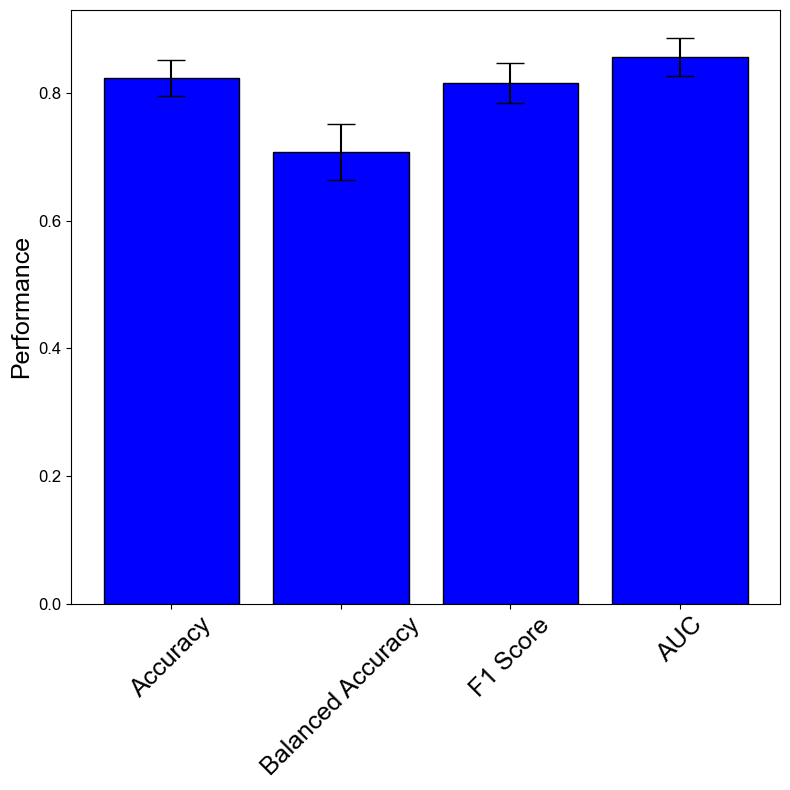

[0.82411859 0.70716354 0.81568511 0.85609539]
[0.02821321 0.04396057 0.03095277 0.02975218]


In [6]:
import matplotlib.pyplot as plt

# Convert to numpy array
all_performance = np.array(all_performance)

# Compute mean and std
mean_perf = all_performance.mean(axis=0)
std_perf = all_performance.std(axis=0)

# Optional: metric names (update as needed)
metric_names = ["Accuracy", "Balanced Accuracy", "F1 Score", "AUC"]

# Plot with error bars
plt.figure(figsize=(8, 8))
plt.bar(range(len(mean_perf)), mean_perf, yerr=std_perf, color = "blue", capsize=10, linewidth=1, edgecolor='black')
plt.xticks(ticks=np.arange(len(mean_perf)), labels=metric_names, rotation=45, fontsize = 18)
plt.ylabel("Performance", fontsize = 18)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig("./tree_performance.png", dpi = 300)
plt.show()

print(mean_perf)
print(std_perf)



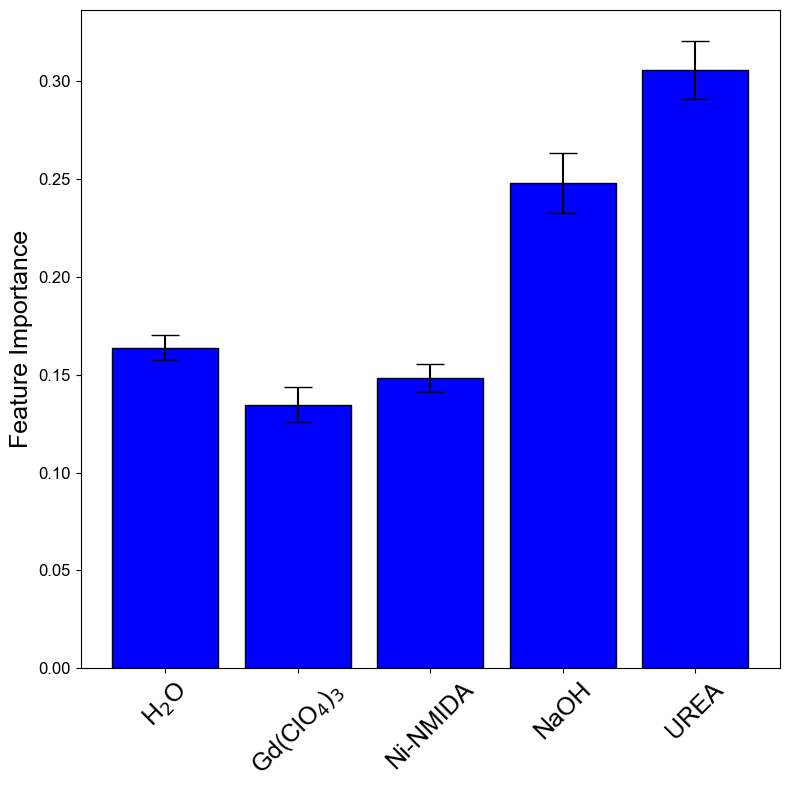

[0.16379274 0.13470073 0.14825386 0.2478619  0.30539077]
[0.00619642 0.00915232 0.00709208 0.0154824  0.01474123]


In [7]:
# Convert to array
feature_importance = np.array(feature_importance)

# Calculate mean and std
mean_importance = feature_importance.mean(axis=0)
std_importance = feature_importance.std(axis=0)

# Feature names (optional – adjust length to match number of features)
feature_names = [r'H$_2$O', r'Gd(ClO$_4$)$_3$', "Ni-NMIDA", "NaOH", "UREA"]

# Plot
plt.figure(figsize=(8, 8))
plt.bar(range(len(mean_importance)), mean_importance, yerr=std_importance, color = "blue", capsize=10, linewidth=1, edgecolor='black')
plt.xticks(ticks=range(len(mean_importance)), labels=feature_names, rotation=45, fontsize = 18)
plt.ylabel("Feature Importance", fontsize = 18)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig("./feature_importance_from_treee.png", dpi = 300)
plt.show()

print(mean_importance)
print(std_importance)

499
125
156


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.54it/s]

[LightGBM] [Info] Number of positive: 112, number of negative: 387
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224449 -> initscore=-1.239926
[LightGBM] [Info] Start training from score -1.239926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.79,0.87,0.87,0.81,0.04
Perceptron,0.79,0.86,0.86,0.81,0.01
BernoulliNB,0.83,0.85,0.85,0.85,0.00
LabelSpreading,0.86,0.79,0.79,0.87,0.02
GaussianNB,0.83,0.77,0.77,0.84,0.01
LabelPropagation,0.86,0.77,0.77,0.86,0.01
KNeighborsClassifier,0.86,0.75,0.75,0.85,0.01
XGBClassifier,0.85,0.75,0.75,0.85,0.04
SVC,0.84,0.74,0.74,0.84,0.02


NearestCentroid
Accuracy: 0.577
Balanced Accuracy: 0.685
F1 Score: 0.602
Perceptron
Accuracy: 0.609
Balanced Accuracy: 0.697
F1 Score: 0.635
BernoulliNB
Accuracy: 0.750
Balanced Accuracy: 0.790
F1 Score: 0.768
LabelSpreading
Accuracy: 0.827
Balanced Accuracy: 0.793
F1 Score: 0.832
GaussianNB
Accuracy: 0.679
Balanced Accuracy: 0.632
F1 Score: 0.696
LabelPropagation
Accuracy: 0.827
Balanced Accuracy: 0.793
F1 Score: 0.832
KNeighborsClassifier
Accuracy: 0.827
Balanced Accuracy: 0.784
F1 Score: 0.831
XGBClassifier
Accuracy: 0.821
Balanced Accuracy: 0.771
F1 Score: 0.824
SVC
Accuracy: 0.814
Balanced Accuracy: 0.757
F1 Score: 0.817
LGBMClassifier
Accuracy: 0.821
Balanced Accuracy: 0.771
F1 Score: 0.824
SGDClassifier
Accuracy: 0.692
Balanced Accuracy: 0.584
F1 Score: 0.695
QuadraticDiscriminantAnalysis
Accuracy: 0.724
Balanced Accuracy: 0.652
F1 Score: 0.732
AdaBoostClassifier
Accuracy: 0.821
Balanced Accuracy: 0.743
F1 Score: 0.819
RandomForestClassifier
Accuracy: 0.788
Balanced Accuracy: 0.

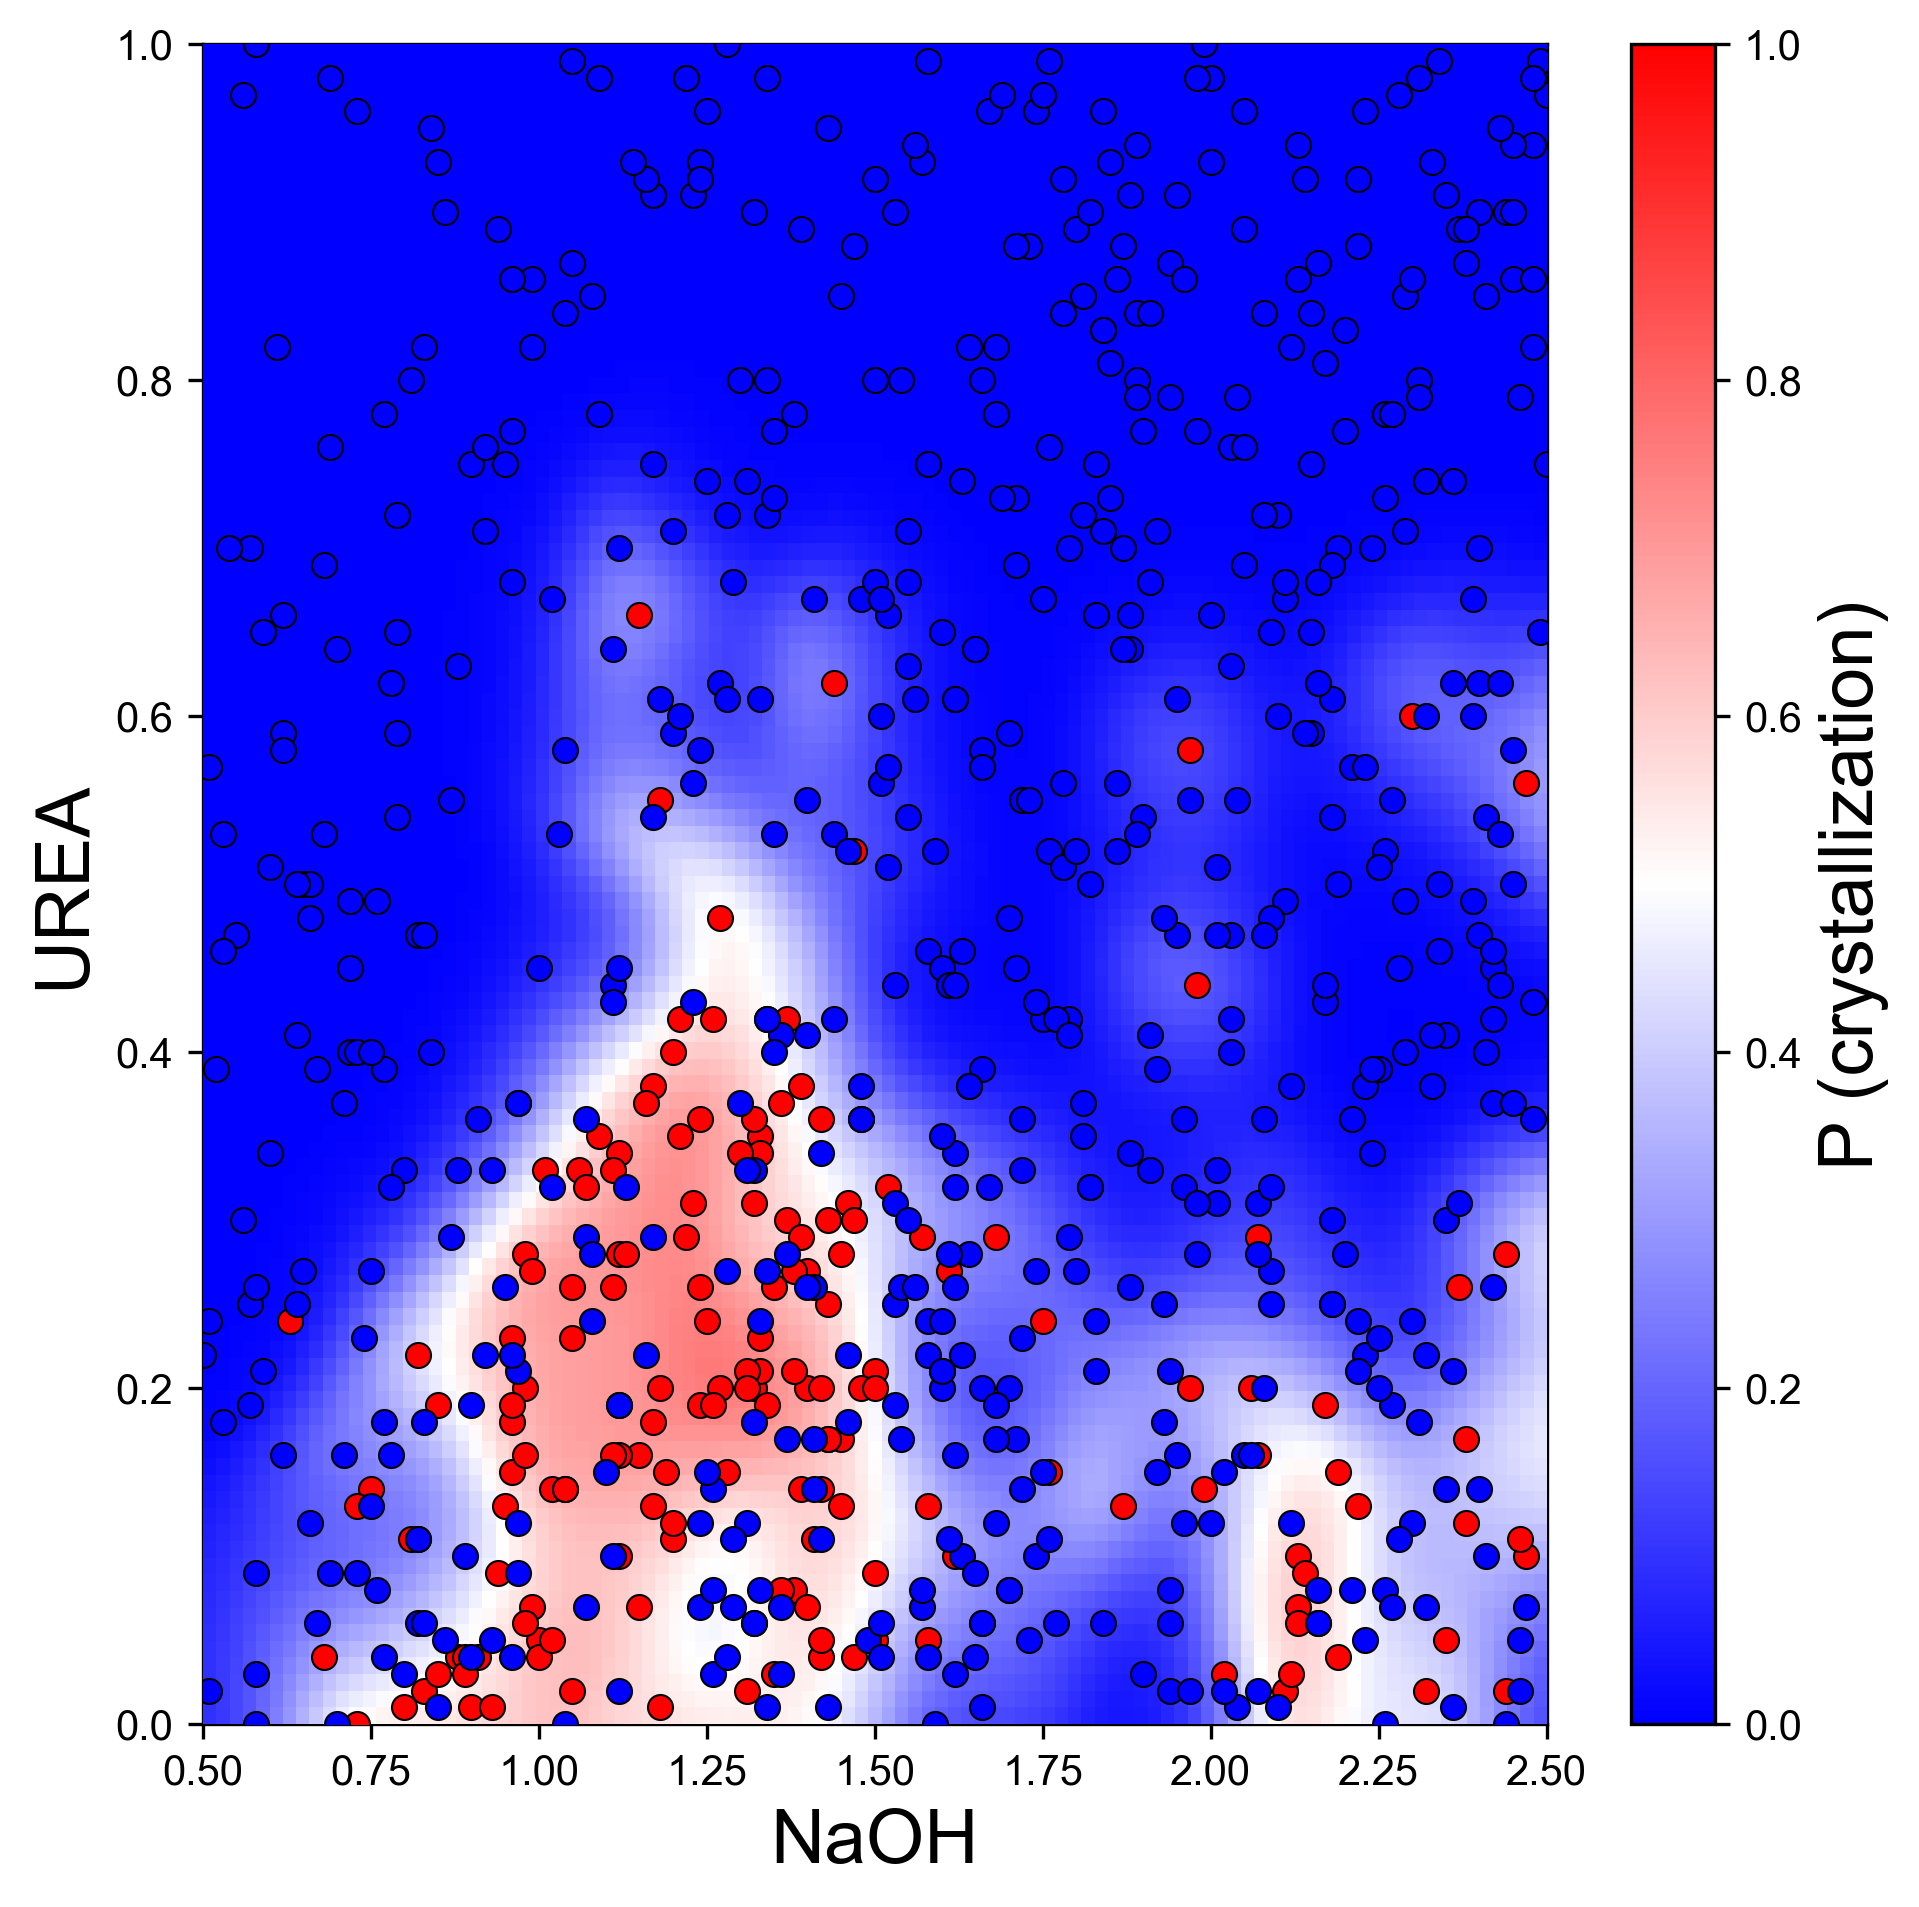

In [13]:
# last two dimensions
dimension_index = [3,4]

X = _X_all[:,dimension_index]
y = _y_all

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state = 42)
X_train_real, X_val, y_train_real, y_val = train_test_split(X_train, y_train,test_size=0.20,random_state = 42)

print(len(X_train_real))
print(len(X_val))
print(len(X_test))


clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_real, X_val, y_train_real, y_val)

display(models)

for model_name in models.index:
    value = clf.models[model_name]
    y_pred = value.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(model_name)
    
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Balanced Accuracy: {balanced_accuracy:.3f}')
    print(f'F1 Score: {f1:.3f}')


X_p = []
for p in np.linspace(X[:,0].min(), X[:,0].max(), 101):
    for q in np.linspace(X[:,1].min(), X[:,1].max(), 101):
        X_p.append([p, q])
        
X_p = np.array(X_p)
score = clf.models["LabelSpreading"].predict_proba(X_p)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8), dpi=300)
ax = fig.add_axes([0.12, 0.09, 0.7, 0.7])

im = ax.imshow(
    np.transpose(score.T[1].reshape([101,101])), 
    cmap='bwr', 
    origin='lower', 
    aspect='auto', 
    extent=[X[:,0].min(), X[:,0].max(),X[:,1].min(), X[:,1].max()], 
    vmin=0.0, 
    vmax=1.0, 
    zorder=5
    )

cb = plt.colorbar(im)
cb.set_label('P (crystallization)', fontsize = 18)
ax.set_xlabel(feature_names[dimension_index[0]], fontsize=18)
ax.set_ylabel(feature_names[dimension_index[1]], fontsize=18)

ax.scatter(X[y == True].T[0], X[y == True].T[1], edgecolors='black', linewidths=0.5, c='red', zorder=10)
ax.scatter(X[y == False].T[0], X[y == False].T[1], edgecolors='black', linewidths=0.5, c='blue', zorder=10)

fig.savefig("./Gd-NaOH.png", dpi=300, bbox_inches='tight')